<a href="https://colab.research.google.com/github/IamSVP94/SEVERSTAL_task/blob/master/REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

In [177]:
path_to_project_directory = '/content/drive/My Drive/Colab Notebooks/SEVERSTAL_task/Data/'

In [178]:
statistics = pd.read_csv(path_to_project_directory+'Статистика за 2018 год.csv', encoding='cp1251')
statistics

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B
...,...,...,...
232,1,4.7,A
233,3,3.4,A
234,2,5.5,A
235,3,5.0,B


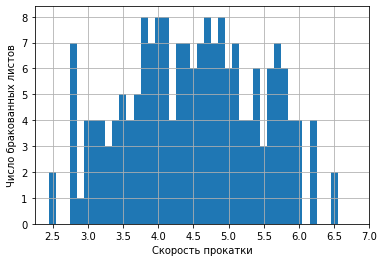

In [179]:
plt.bar(statistics['Скорость прокатки'],
        statistics['Число бракованных листов'],
        width=0.1)
plt.xlabel('Скорость прокатки')
plt.ylabel('Число бракованных листов')
plt.yticks(statistics['Число бракованных листов'].unique())
plt.xticks(np.arange(min(statistics['Скорость прокатки']), 
                     max(statistics['Скорость прокатки'])+1, 
                     0.5))

plt.grid()

In [180]:
statistics[statistics['Марка стали']=='A']['Число бракованных листов'].mean(), \
statistics[statistics['Марка стали']=='B']['Число бракованных листов'].mean()

(3.179856115107914, 3.36734693877551)

95% доверительные интервалы для средних значений

In [181]:
_tconfint_generic(statistics[statistics['Марка стали']=='A']['Число бракованных листов'].mean(), 
                  statistics[statistics['Марка стали']=='A']['Число бракованных листов'].std(ddof=1) / np.sqrt(len(statistics[statistics['Марка стали']=='A']['Число бракованных листов'])),                  
                  len(statistics[statistics['Марка стали']=='A']['Число бракованных листов']) - 1, 
                  0.05, 'two-sided')

(2.8630226081965824, 3.4966896220192454)

In [182]:
_tconfint_generic(statistics[statistics['Марка стали']=='B']['Число бракованных листов'].mean(), 
                  statistics[statistics['Марка стали']=='B']['Число бракованных листов'].std(ddof=1) / np.sqrt(len(statistics[statistics['Марка стали']=='A']['Число бракованных листов'])),                  
                  len(statistics[statistics['Марка стали']=='B']['Число бракованных листов']) - 1, 
                  0.05, 'two-sided')

(3.0829856289671023, 3.651708248583918)

Действительно, в среднем брака на нашей выборке марки A больше, чем на B

In [183]:
statistics[statistics['Скорость прокатки']<=4]['Число бракованных листов'].mean(), \
statistics[statistics['Скорость прокатки']>4]['Число бракованных листов'].mean()

(3.0689655172413794, 3.3184357541899443)

Действительно, в среднем брака на нашей выборке со скоростью обкатки свыше 4-х м/с становится больше

<hr>

**Гипотеза 1**: Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.


In [184]:
statistics[(statistics['Марка стали']=='A') & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean(), \
statistics[(statistics['Марка стали']=='B') & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean()

(5.113207547169812, 4.886363636363637)

<hr>

**Гипотеза 2**: При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.


In [185]:
statistics[(statistics['Скорость прокатки']<=4) & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean(), \
statistics[(statistics['Скорость прокатки']>4) & (statistics['Число бракованных листов']>3)]['Число бракованных листов'].mean()

(4.869565217391305, 5.054054054054054)

## Задание 2

In [186]:
X_data = pd.read_csv(path_to_project_directory+'X_data.csv', encoding='cp1251', sep=';')
Y_train = pd.read_csv(path_to_project_directory+'Y_train.csv', encoding='cp1251', sep=';', header=None, index_col=0)
Y_submit = pd.read_csv(path_to_project_directory+'Y_submit.csv', encoding='cp1251', sep=';', header=None, index_col=0)

In [187]:
Y_train.head(3)

,1
0,
2015-01-04 00:05:00,392
2015-01-04 01:05:00,384
2015-01-04 02:05:00,393


In [188]:
Y_submit.head(3)

,1
0,
2018-05-04 00:05:00,420
2018-05-04 01:05:00,420
2018-05-04 02:05:00,420


In [189]:
X_data

,Unnamed: 0,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,2018-12-31 23:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2103837,2018-12-31 23:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2103838,2018-12-31 23:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44
2103839,2018-12-31 23:59:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,162.96,8.44


In [190]:
X_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103841 entries, 0 to 2103840
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  2103841 non-null  object 
 1   T_data_1_1  2103841 non-null  int64  
 2   T_data_1_2  2103841 non-null  int64  
 3   T_data_1_3  2103841 non-null  int64  
 4   T_data_2_1  2103841 non-null  int64  
 5   T_data_2_2  2103841 non-null  int64  
 6   T_data_2_3  2103841 non-null  int64  
 7   T_data_3_1  2103841 non-null  int64  
 8   T_data_3_2  2103841 non-null  int64  
 9   T_data_3_3  2103841 non-null  int64  
 10  T_data_4_1  2103841 non-null  int64  
 11  T_data_4_2  2103841 non-null  int64  
 12  T_data_4_3  2103841 non-null  int64  
 13  T_data_5_1  2103841 non-null  int64  
 14  T_data_5_2  2103841 non-null  int64  
 15  T_data_5_3  2103841 non-null  int64  
 16  H_data      2103841 non-null  float64
 17  AH_data     2103841 non-null  float64
dtypes: float64(2), int64(1

Пропущенных значений нет. Все столбцы содержат 2103841 значений, что равняется длине всего датафрейма<br>
Так как значения _H_data_ и _AH_data_ фиксируются на **входе**, то приходим к мнению, что в _1 колонке X_data_ записано *время начала проката*. Чтобы сопоставить данные с детекторов и данные из Y_train к каждому значению X_data['Unnamed: 0'] прибавим время 1 полного прохода обжига, то есть 1 час.

In [191]:
from datetime import datetime, timedelta

print(X_data['Unnamed: 0'].dtype)
X_data['Unnamed: 0'] = pd.to_datetime(X_data['Unnamed: 0']) + timedelta(hours=1)
print(X_data['Unnamed: 0'].dtype)

object
datetime64[ns]


In [192]:
X_data = X_data.set_index(['Unnamed: 0'])
X_data

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
2015-01-01 01:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2015-01-01 01:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
2015-01-01 01:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
2015-01-01 01:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 00:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2019-01-01 00:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2019-01-01 00:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44


In [193]:
q = pd.DataFrame(columns = X_data.columns)
q.loc[Y_train.index[0]] = (X_data.loc[Y_train.index[0]]).T
q.loc[Y_train.index[-1]] = (X_data.loc[Y_train.index[-1]]).T

In [196]:
q

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
2015-01-04 00:05:00,266.0,339.0,263.0,335.0,326.0,341.0,495.0,497.0,535.0,316.0,346.0,336.0,234.0,238.0,239.0,154.87,4.73
2018-05-03 23:05:00,255.0,255.0,260.0,356.0,352.0,354.0,438.0,468.0,441.0,347.0,357.0,344.0,254.0,265.0,248.0,153.89,8.90
